In [ ]:
import os
import matplotlib.pyplot as plt
import rasterio
import glob 
list = glob.glob("/home/ageorgakis/Desktop/modis_cropped_test/" + "*.tif")   
# Paths
cloud_mask_dir = os.path.expanduser("~/Desktop/modis_cropped_test")
thermal_patch_dir = "/mnt/seviri/Valentina_SR_final_2/modis_crop_128/"
print(list[0])
# Example patch name (adjust as needed)
patch_name = list[0][:-10]#"20230923094242_patch_330"
patch_name = "20230923094242_patch_331"
print(patch_name)

cloud_mask_file = os.path.join(cloud_mask_dir, f"{patch_name}_modis_cloud.tif")
thermal_patch_file = os.path.join(thermal_patch_dir, f"{patch_name}_modis.tif")

# Load images
def load_raster(path):
    with rasterio.open(path) as src:
        return src.read(1)

cloud_mask = load_raster(cloud_mask_file)
thermal_band = load_raster(thermal_patch_file)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(thermal_band, cmap="inferno")
axes[0].set_title("Thermal Band Patch")
axes[0].axis("off")

axes[1].imshow(cloud_mask, cmap="gray")
axes[1].set_title("Cloud Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()


/home/ageorgakis/Desktop/modis_cropped_test/20230719195742_patch_185_modis_cloud.tif
20230923094242_patch_250


RasterioIOError: /home/ageorgakis/Desktop/modis_cropped_test/20230923094242_patch_250_modis_cloud.tif: No such file or directory

First cloud mask file: /home/ageorgakis/Desktop/modis_cropped_test/20230719195742_patch_185_modis_cloud.tif
Extracted patch name: 20200813132743_patch_203


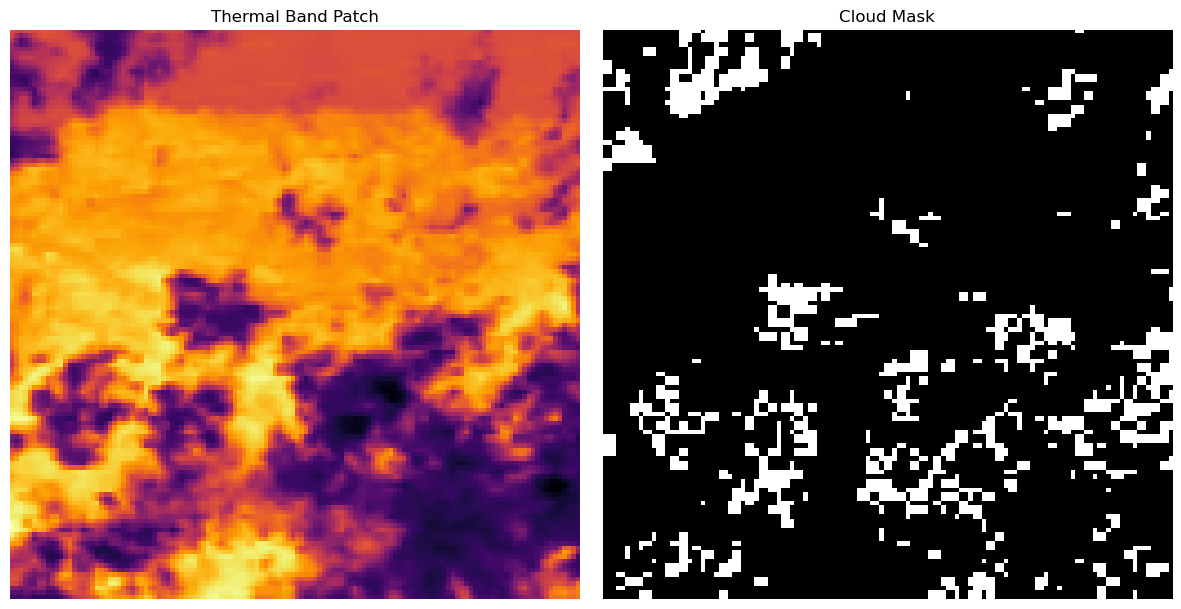

In [35]:
import os
import matplotlib.pyplot as plt
import rasterio
import glob 

# Paths
cloud_mask_dir = os.path.expanduser("~/Desktop/modis_cropped_test")
thermal_patch_dir = "/mnt/seviri/Valentina_SR_final_2/modis_crop_128/"

# Get list of cloud mask files
file_list = glob.glob(os.path.join(cloud_mask_dir, "*.tif"))

print("First cloud mask file:", file_list[0])

# Extract patch name by removing directory, suffix, and extension
filename = os.path.basename(file_list[7])  # e.g. "20230923094242_patch_331_modis_cloud.tif"
patch_name = filename.replace("_modis_cloud.tif", "")  # --> "20230923094242_patch_331"

print("Extracted patch name:", patch_name)

# Build paths
cloud_mask_file = os.path.join(cloud_mask_dir, f"{patch_name}_modis_cloud.tif")
thermal_patch_file = os.path.join(thermal_patch_dir, f"{patch_name}_modis.tif")  # careful: check if thermal has "_modis" or not

# Load images

# Load rasters
def load_raster(path, band=1):
    with rasterio.open(path) as src:
        return src.read(band)  # read chosen band

# 👇 pick which band you want to display
thermal_band_index = 10   # change to 2, 3, 4... depending on your needs

cloud_mask = load_raster(cloud_mask_file)
thermal_band = load_raster(thermal_patch_file, band=thermal_band_index)




# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(thermal_band, cmap="inferno")
axes[0].set_title("Thermal Band Patch")
axes[0].axis("off")

axes[1].imshow(cloud_mask, cmap="gray")
axes[1].set_title("Cloud Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()


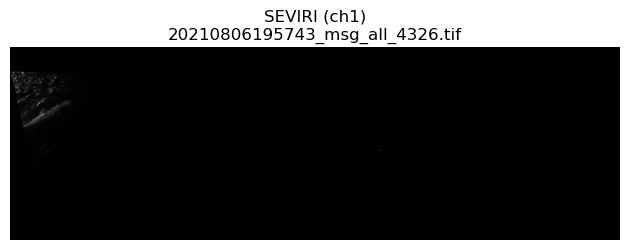

In [ ]:
import random
from pathlib import Path
import rasterio
import matplotlib.pyplot as plt
import numpy as np


seviri_dir = Path("/mnt/nvme2tb/aggelos_seviri")
modis_dir  = Path("/mnt/nvme2tb/aggelos_modis")
pairs_dir  = Path("/mnt/nvme2tb/aggelos_modis_seviri_pairs")
modis_initial_dir = Path("/mnt/seviri/Valentina_SR_final_2/modis_crop_128")
# --- Show some raw SEVIRI + MODIS images ---
fig = plt.plot(figsize=(10, 8))
seviri_file = random.choice(list(seviri_dir.glob("*.tif")))
modis_file  = random.choice(list(modis_dir.glob("*.tif")))
modis_file = 
#plt.sca(show_image(seviri_file, band=1, title=f"SEVIRI (ch1)\n{seviri_file.name}")

path = seviri_file
band = 1
title = f"SEVIRI (ch1)\n{seviri_file.name}"
cmap = "gray"
with rasterio.open(path) as ds:
    arr = ds.read(band)
arr = np.nan_to_num(arr, nan=0.0)
plt.imshow(arr, cmap=cmap)
plt.title(title or Path(path).name)
plt.axis("off")

#plt.sca(axes[0,1]); show_image(modis_file, band=1, title=f"MODIS (cloud mask)\n{modis_file.name}")

# --- Show some paired patches ---
pair_modis = random.choice(list(pairs_dir.glob("*_modis.tif")))
pair_seviri = Path(str(pair_modis).replace("_modis.tif", "_seviri.tif"))

#plt.sca(axes[1,0]); show_image(pair_seviri, band=1, title=f"Paired SEVIRI (32x32)\n{pair_seviri.name}")
#plt.sca(axes[1,1]); show_image(pair_modis, band=1, title=f"Paired MODIS (128x128)\n{pair_modis.name}")

plt.tight_layout()
plt.show()

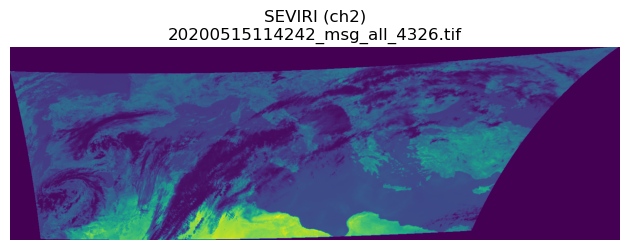

In [38]:
from pathlib import Path
import rasterio
import matplotlib.pyplot as plt
import numpy as np
#find distorted images
seviri_file = Path("/mnt/nvme2tb/aggelos_seviri/20200515114242_msg_all_4326.tif")
#modis_file  = random.choice(list(modis_dir.glob("*.tif")))

#plt.sca(show_image(seviri_file, band=1, title=f"SEVIRI (ch1)\n{seviri_file.name}")

path = seviri_file
band = 2
title = f"SEVIRI (ch2)\n{seviri_file.name}"
cmap = "viridis"
with rasterio.open(path) as ds:
    arr = ds.read(band)
arr = np.nan_to_num(arr, nan=0.0)
plt.imshow(arr, cmap=cmap)
plt.title(title or Path(path).name)
plt.axis("off")

#plt.sca(axes[0,1]); show_image(modis_file, band=1, title=f"MODIS (cloud mask)\n{modis_file.name}")

# --- Show some paired patches ---
#pair_modis = random.choice(list(pairs_dir.glob("*_modis.tif")))
#pair_seviri = Path(str(pair_modis).replace("_modis.tif", "_seviri.tif"))

#plt.sca(axes[1,0]); show_image(pair_seviri, band=1, title=f"Paired SEVIRI (32x32)\n{pair_seviri.name}")
#plt.sca(axes[1,1]); show_image(pair_modis, band=1, title=f"Paired MODIS (128x128)\n{pair_modis.name}")

plt.tight_layout()
plt.show()

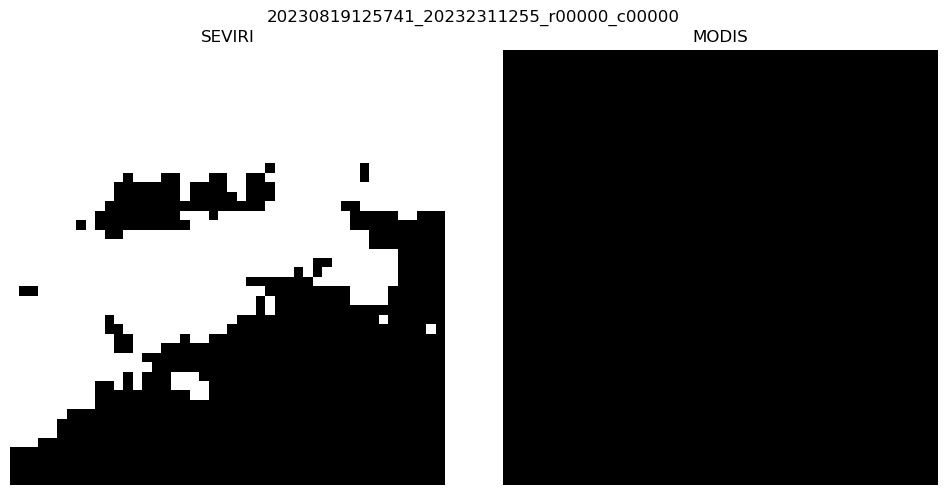

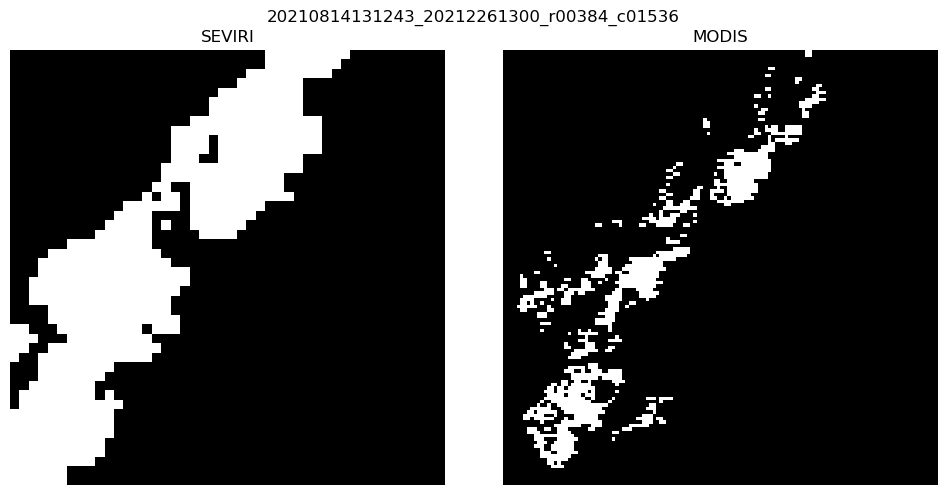

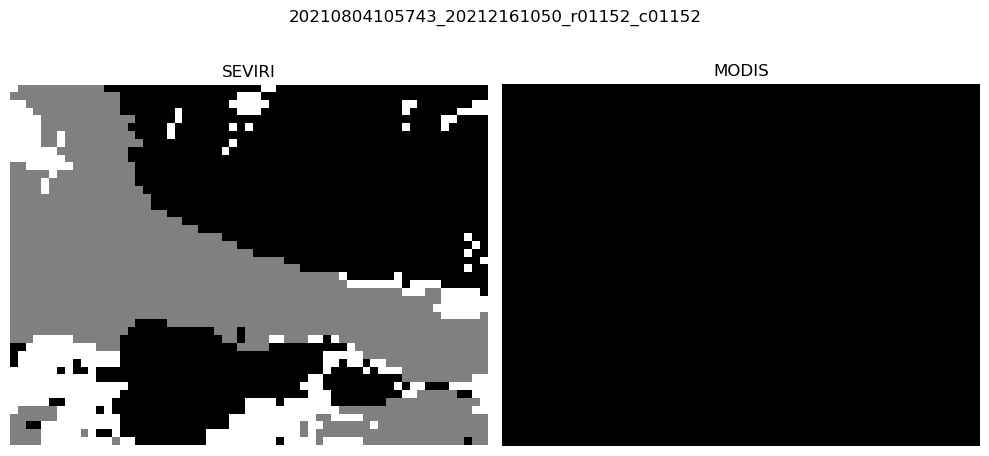

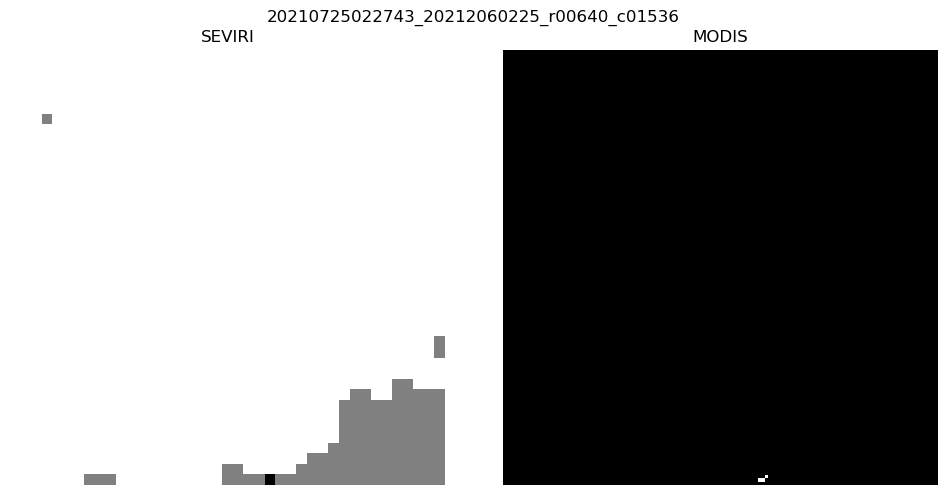

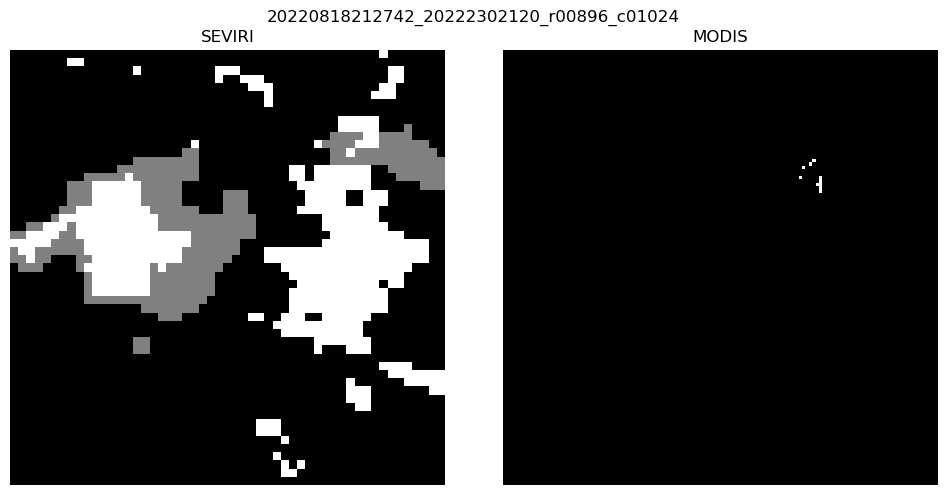

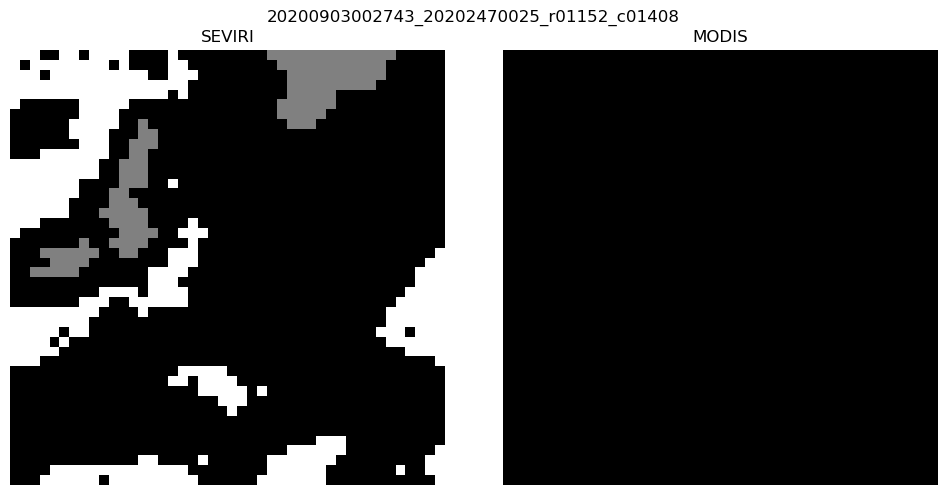

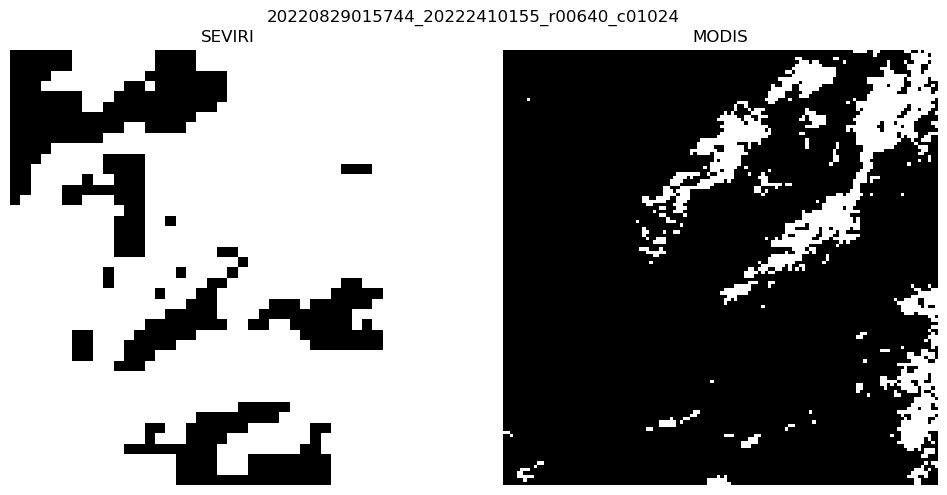

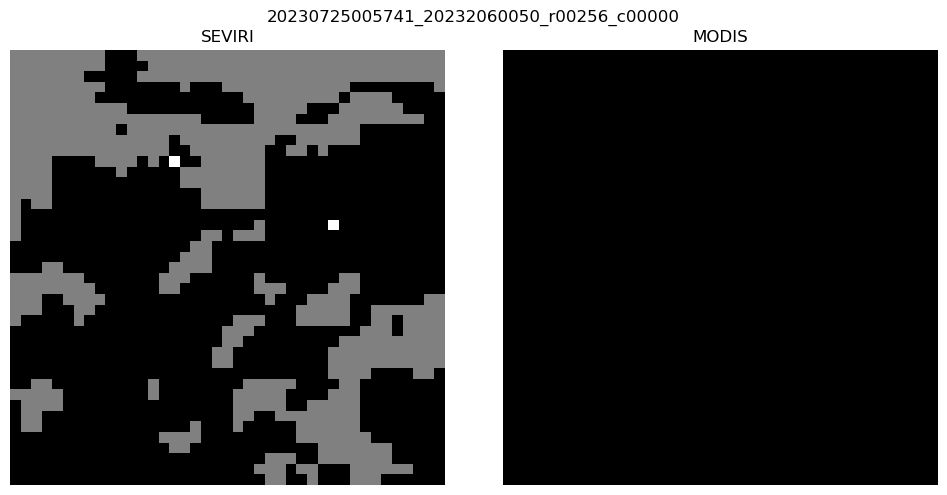

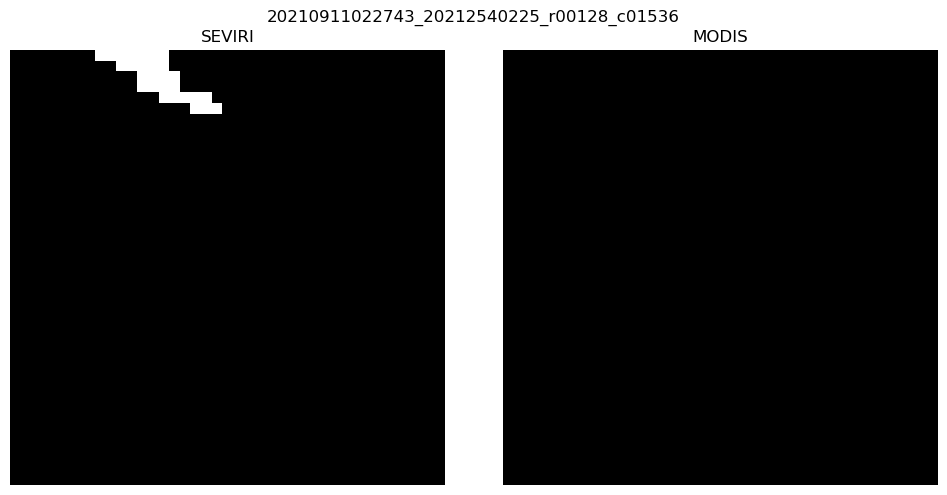

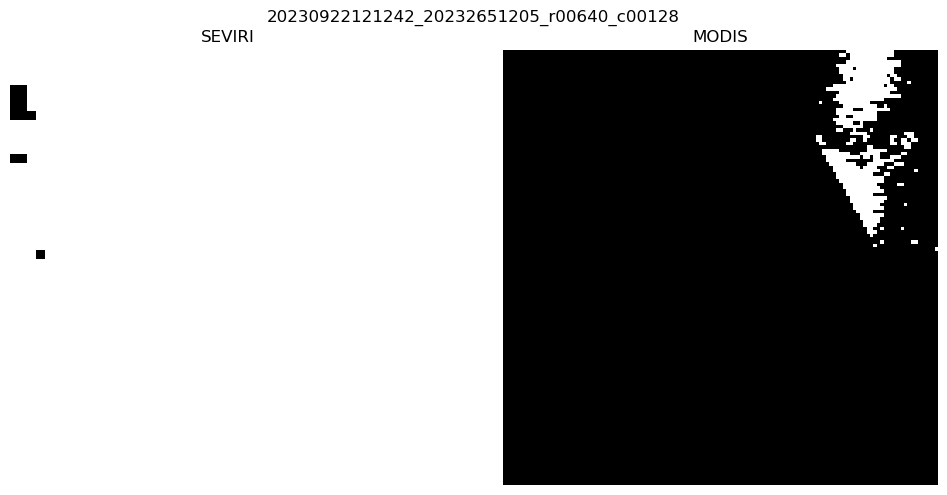

In [6]:
import os
import glob
import random
import rasterio
import matplotlib.pyplot as plt

# Directory containing pairs
base_dir = "/mnt/nvme2tb/aggelos_modis_seviri_pairs"

# Find all SEVIRI images
seviri_files = sorted(glob.glob(os.path.join(base_dir, "*_seviri.tif")))

# Pick 10 random pairs (or fewer if less exist)
sample_files = random.sample(seviri_files, min(10, len(seviri_files)))

for seviri_path in sample_files:
    modis_path = seviri_path.replace("_seviri.tif", "_modis.tif")

    if not os.path.exists(modis_path):
        print(f"⚠️ Missing MODIS pair for {seviri_path}")
        continue

    # Read both images (1st band)
    with rasterio.open(seviri_path) as src_seviri:
        seviri_img = src_seviri.read(12)
    with rasterio.open(modis_path) as src_modis:
        modis_img = src_modis.read(1)

    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(seviri_img, cmap="gray")
    axes[0].set_title("SEVIRI")
    axes[0].axis("off")

    axes[1].imshow(modis_img, cmap="gray")
    axes[1].set_title("MODIS")
    axes[1].axis("off")

    plt.suptitle(os.path.basename(seviri_path).replace("_seviri.tif", ""))
    plt.tight_layout()
    plt.show()
